# Task 3

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import time

from sklearn.model_selection import train_test_split


from keras import optimizers
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, TensorBoard

%load_ext tensorboard

In [0]:
seed = 33
np.random.RandomState(seed)

RandomState(MT19937) at 0x7F5541ADBDB0

### Data Loading and Preparation

In [0]:
data_path = '/content/drive/My Drive/Colab Notebooks/Kannada-MNIST/'

train_path = data_path + 'train.csv'
test_path = data_path + 'test.csv'
sample_path = data_path + 'sample_submission.csv'

In [0]:
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
sample_df = pd.read_csv(sample_path)

In [0]:
X = train_df.drop('label', axis=1).to_numpy()
y = train_df['label'].to_numpy()
X_test = test_df.drop('id', axis=1).to_numpy()

X = X.reshape(-1, 28, 28, 1)
y = to_categorical(y)
X_test = X_test.reshape(-1, 28, 28, 1)

X = X / 255
X_test = X_test / 255

print('X shape is {}'.format(X.shape))
print('y shape is {}'.format(y.shape))
print('X_test shape is {}'.format(X_test.shape))

X shape is (60000, 28, 28, 1)
y shape is (60000, 10)
X_test shape is (5000, 28, 28, 1)


In [0]:
X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size = 0.1, random_state=seed)

###  CNN Model

In [0]:
def build_model(optimizer):
    model = Sequential()

    model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.25))


    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
    model.add(BatchNormalization())    
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(256, activation = "relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(10, activation = "softmax"))
    
    model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics=["accuracy"])
    
    return model

### Data augmentation

In [0]:
# Data augmentation to prevent overfitting

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

datagen_val = ImageDataGenerator()

### Train

In [0]:
batch_size = 1024
verbose = 1
epochs = 50

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=0, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [0]:
# model_to_submit = build_model('RMSprop')
# start = time.time()
# h = model_to_submit.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
#                               epochs = epochs, validation_data = datagen_val.flow(X_val, Y_val),
#                               verbose = verbose, steps_per_epoch=100,
#                               validation_steps=50, callbacks=[learning_rate_reduction])
# print(f"Training time={(time.time()-start)/60} min")

### Prediction and Submission

In [0]:
# # make predictions helper function
# def make_prediction(model, x):
#     y_pred = model.predict(x)
#     return np.argmax(y_pred, axis=1)

In [0]:
# # predict on the test set
# y_result = make_prediction(model_to_submit, X_test)

# # save predictions
# sample_df['label'] = y_result
# sample_df.to_csv('submission.csv',index=False)

### Kaggle Scores

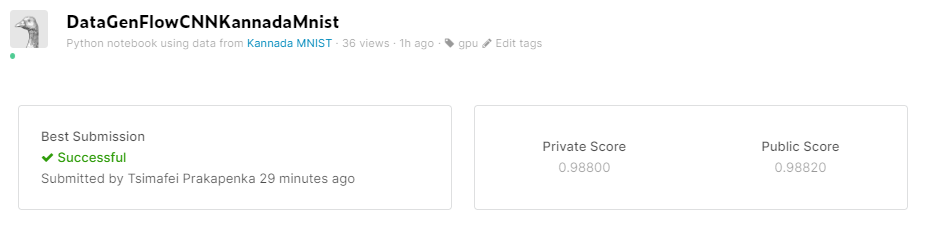

# Task 4

### 1)
а) Для обучения была использована функция активации ReLu.
Данная функция вычислительно эффективна и нелинейна. Отрицательных входов или входов полностью из нулей наши данные не предполагают, поэтому градиент функции не будет равным нулю. Значит сеть сможет выполнять обратное распространение ошибки и будет корректно учиться.<br>
б) Для формирование вывода использована активация Softmax.
Эта функция способна обрабатывать несколько классов и классифирует входы по 10 категориям в нашем случае.

### 2)
Конкретно для моей модели BatchNormalization в среднем улучшила public/private score на 0.003, однако, немного замедлила обучение. Видимо, временные затраты на внутренний сдвиг меньше времени расчета 5 нормализационных слоев.

Применение BatchNormalization для нормирования выходов из слоев позволяет учить последующие слои на данныx из одного и того же распределения, поэтому улучшение качества модели выглядит логичным.

# Task 5

Для данной подзадачи не будем искусственно увеличивать датасет, чтобы ускорить обучение.

In [0]:
batch_size = 1024
verbose = 0
epochs = 30

optimizers_dict = {
    'sgd':        'SGD',
    'sdg-momentum': optimizers.SGD(lr=0.02, momentum=0.9),
    'rmsprop':    'RMSprop',
    'adam':       'Adam',
}

In [0]:
# prepare empty dictionaries
history = {}
models = {}

for opt_name, optimizer in optimizers_dict.items():
    # build model for every optimizer
    models[opt_name] = build_model(optimizer)

    # measure training time
    start = time.time()
    h = models[opt_name].fit(X_train, Y_train, batch_size=batch_size,
                              epochs = epochs, validation_data = (X_val, Y_val),
                              verbose = verbose, callbacks=[learning_rate_reduction, TensorBoard(log_dir=f'logs_{opt_name}')])

    history[opt_name] = h.history

    # print results
    print("{0} Optimizer: ".format(opt_name))
    print("Epochs={0:d}, Train accuracy={1:.5f}, Validation accuracy={2:.5f}, Training time={3:.2f} minutes"
              .format(epochs, 
                      max(history[opt_name]['accuracy']), 
                      max(history[opt_name]['val_accuracy']), 
                      (time.time()-start)/60))

sgd Optimizer: 
Epochs=30, Train accuracy=0.97878, Validation accuracy=0.98550, Training time=5.93 minutes
sdg-momentum Optimizer: 
Epochs=30, Train accuracy=0.99552, Validation accuracy=0.99450, Training time=5.95 minutes
rmsprop Optimizer: 
Epochs=30, Train accuracy=0.99989, Validation accuracy=0.99583, Training time=5.97 minutes
adam Optimizer: 
Epochs=30, Train accuracy=0.99957, Validation accuracy=0.99600, Training time=5.99 minutes


In [0]:
# from google.colab import files

# # saving csv logs
# for opt_name in optimizers_dict:
#     pd.DataFrame.from_dict(history[opt_name]).to_csv(f'{opt_name}.csv')
#     !zip -r logs_"$opt_name".zip logs_"$opt_name"
#     files.download(f"logs_{opt_name}.zip")
#     files.download(f"{opt_name}.csv")

В приложенных к отчету csv файлах видно, что каждый оптимизатор ближе к концу обучения уменьшал свой learning rate по умолчанию.

## Graphical analysis

Все графики изменения функции потерь показаны в логарифмическом масштабе.

### SGD

In [0]:
#%tensorboard --logdir logs_sgd

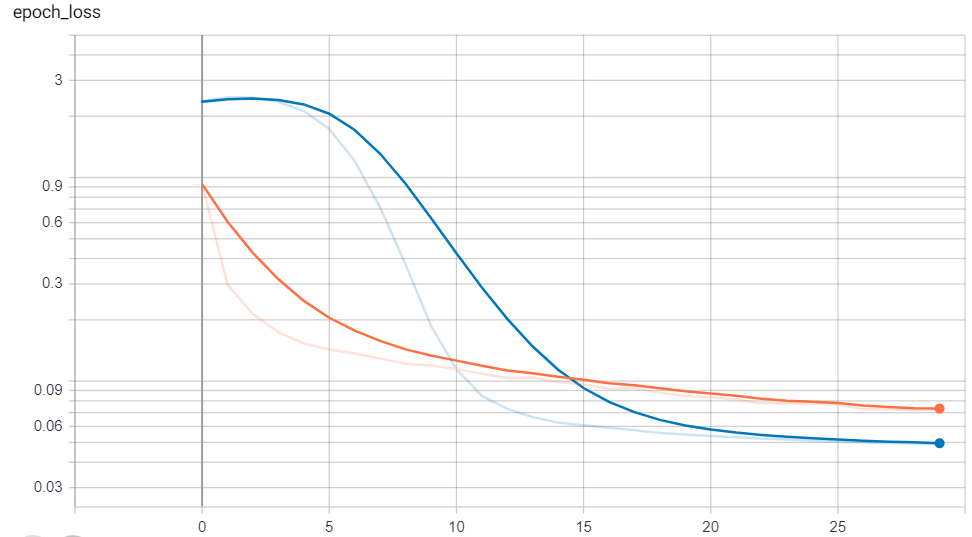

По сравнению с другими методами классический SGD сходится гораздо медленнее (стартует с точности 0.7, например) и по итогу 30 эпох дает хуже натренированную модель. Однако, он почти избавлен от скачков и сходится довольно плавно.

### SGD-Momentum

In [0]:
#%tensorboard --logdir logs_sdg-momentum

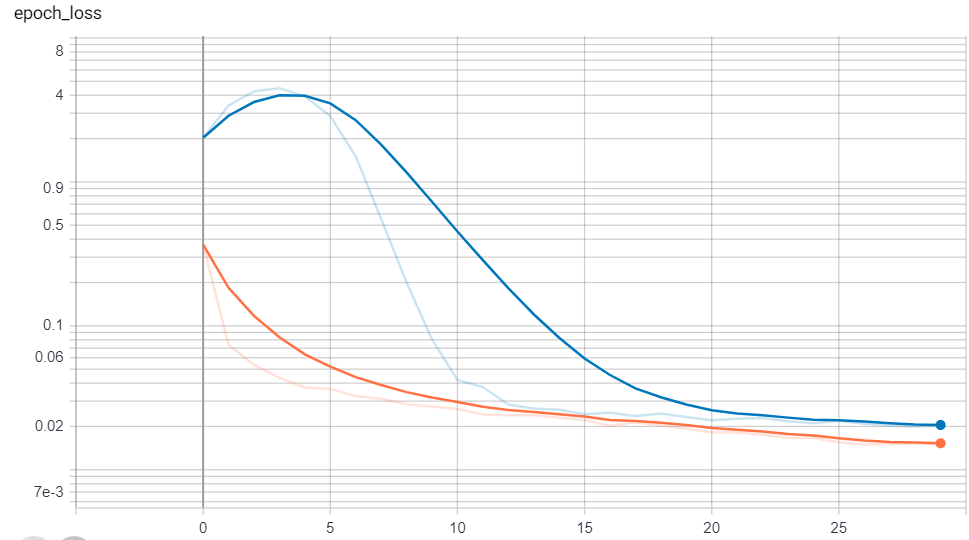

SGD-Momentum после небольшого скачка вначале со временем синхронизирует скоры на тренировке и валидации, однако, все еще сходится медленно, так как валидация после 30 эпох продолжает уменьшаться.

### RMSprop

In [0]:
#%tensorboard --logdir logs_rmsprop

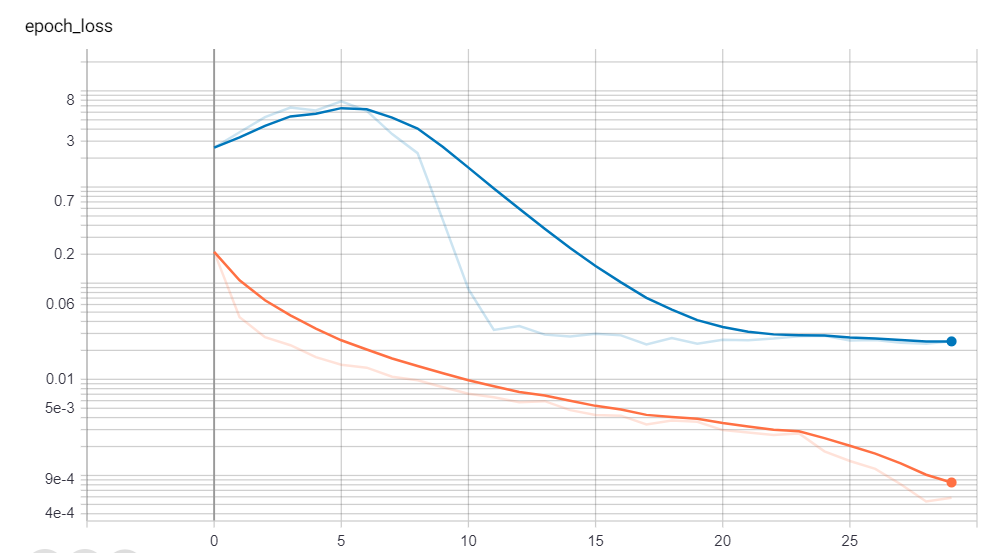

Вначале наблюдается довольно мощных скачок функции потерь на валидации, однако, после 20 эпох (гораздо быстрее чем SGD) график валидации сходится и фактически затухает. RMSprop дает лучшие финальные значения на тренировке и валидации, чем два предыдущих метода.

### Adam

In [0]:
#%tensorboard --logdir logs_adam

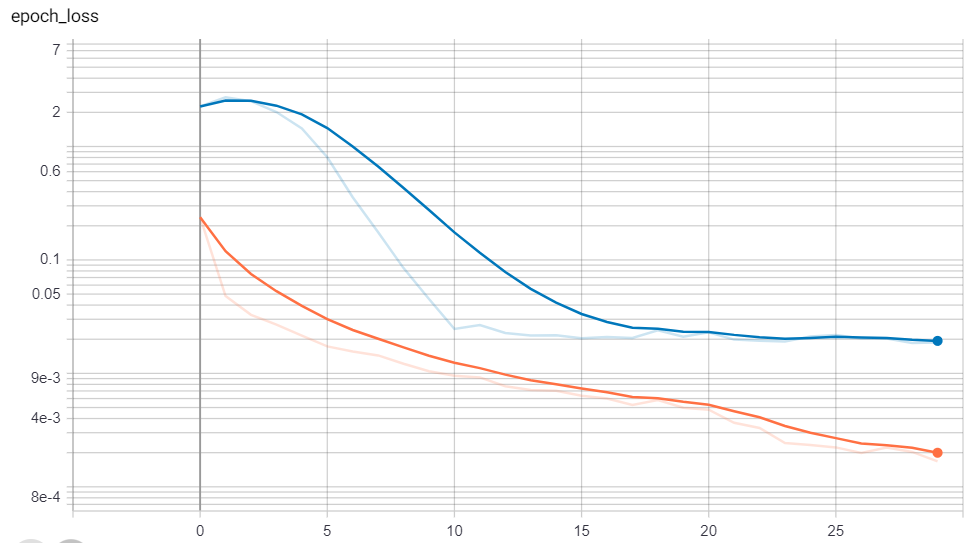

Adam ведет себя похоже на RMSprop (быстрая сходимость, после 20 эпох график валидации фактически затухает), однако, не имеет такого большого скачка вначале и по итогу показывает лучший результат.


In [0]:
def get_best_optimizer(history, optimizers):
    # allocate memory
    best_val_scores = np.zeros((len(optimizers),))
    
    # find best score for each optimizer
    for n, h in enumerate(history.values()):
        # get validation accuracy history
        val_acc = h['val_accuracy']
        
        # find best val score
        best_val_scores[n] = np.max(val_acc)

    print(list(optimizers.keys()))
    print(best_val_scores)
    # returns best optimizers key as string
    return list(optimizers.keys())[np.argmax(best_val_scores)]

In [0]:
best_optimizer = get_best_optimizer(history, optimizers_dict)

print("Optimizer with best validation score is '{}'.".format(optimizers_dict[best_optimizer]))

['sgd', 'sdg-momentum', 'rmsprop', 'adam']
[0.98549998 0.99449998 0.99583334 0.99599999]
Optimizer with best validation score is 'Adam'.
